# CS342 Machine Learning

# Lab 5: PCA for dimensionality reduction & eigenfaces

## Department of Computer Science, University of Warwick


Recall that Principal Component Analysis (PCA) is a latent factor model that allows finding a new basis, **Z**, where a sample **x**$_{i}$ can be represented as a combination of basic parts, or principal components (PCs). Each **z**$_{i}$ in matrix **Z** is the new feature representation of **x**$_{i}$. If the dimensions of **z**$_{i}$ are less than those of **x**$_{i}$, PCA provides dimensionality reduction. 

In this lab, we will explore PCA on imaging data. Specifically, we will use the face images contained in the _Labeled Faces in the Wild_ (LFW) dataset for classification after applying PCA. 

When PCA is applied to face images, the PCs are called **eigenfaces** because they can be reshaped into matrices and displayed as images.

The LFW dataset contains grey-level face images of famous people. All images are resized to a size of $47 \times 62$ pixels. For more information about the dataset, please check this link: http://vis-www.cs.umass.edu/lfw/

# Data files for the lab

The data will be loaded directly from the module directory, as shown in the scripts below.

If you are using your own machine, copy the data across by running the following command in a terminal window using the remote node corresponding to your username. The name of this remote node uses the last two digits of your username in the form remote-nn, for example, if your username is u1234567 you would connect to remote-67.dcs.warwick.ac.uk (recall to use your USERNAME and corresponding REMOTE_NN):

```scp USERNAME@REMOTE_NN.dcs.warwick.ac.uk:/modules/cs342/2020/lab5/data/* .```

After entering your DCS password, this will copy the data to your current working directory. You should now have the following files:
```
├──[your working directory]
   └── X.npy
   └── Y.npy
```
**Please make sure to use the correct path to these files when working on your own machine. The scripts below assume you are working on the DCS machines. Recall that the *.ipynb file (this file) should be in your working directory.**

### Use the code below to upload the LFW dataset and to split it into a training set and a test set

a. Note that when working with images, they should be re-shaped from matrices to feature vectors.

b. File X.npy contains several images, while file y.npy contains the labels (the name of the person displayed on each image). The labels in this lab will be used simply to display the names.

b. In this lab, we will only use the training set. 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import PIL 
from sklearn.model_selection import train_test_split


# Load all the images
X = np.load("/modules/cs342/2020/lab5/data/X.npy")
y = np.load("/modules/cs342/2020/lab5/data/Y.npy")

# Display the number of samples
print ("Total number of images: ",X.shape[0])

#Reshape the first image
first_image = X[0].reshape(62,47)
h , w = first_image.shape

# Display the width and height of each image
print ("Image HEIGHT: ",h)
print ("Image WIDTH: ",w)

target_names = ['Colin Powell','Donald Rumsfeld','George W Bush','Gerhard Schroeder','Tony Blair']

# Display the classes available in the dataset
print ("Classes : %d" % len(target_names),target_names)

# Split all data (X) into a training and testing datasets. The test dataset contains 30% of all data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

n, d = X_train.shape
print ("Number of images in the training dataset: ",n)
print ("Dimensions of feature vectors in the training dataset: ",d)
n, d = X_test.shape
print ("Number of images in the test dataset: ",n)
print ("Dimensions of feature vectors in the test dataset: ",d)

plt.imshow(first_image, cmap='bone')
plt.title("FIRST Training Image")
plt.show()


Total number of images:  1140
Image HEIGHT:  62
Image WIDTH:  47
Classes : 5 ['Colin Powell', 'Donald Rumsfeld', 'George W Bush', 'Gerhard Schroeder', 'Tony Blair']
Number of images in the training dataset:  798
Dimensions of feature vectors in the training dataset:  2914
Number of images in the test dataset:  342
Dimensions of feature vectors in the test dataset:  2914


<Figure size 640x480 with 1 Axes>

### Display a number of training images

a. Use the _add_subplot_ command to display the **first 15 training images** in a grid of 3 rows X 5 columns. 

b. Each **figure** should be displayed with a size of 12 X 12. Hint: use parameter _figsize(12,12)_.

b. Use the 'bone' color map to display the images.

c. Display the label of each image at the top of it. Hint: use the _set_title_ command.


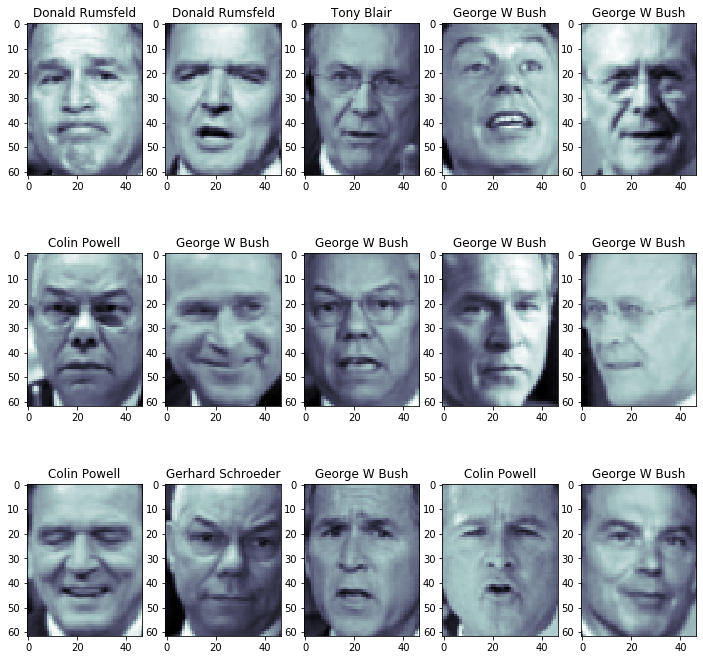

In [3]:
# Code to display the first 15 training images
fig, plots = plt.subplots(3, 5, figsize=(12,12))
for i,ps in enumerate(plots):
    for j,p in enumerate(ps):
        k = i*5+j
        im = X[k].reshape(62,47)
        p.imshow(im, cmap='bone')
        p.set_title(f"{target_names[y_train[k]]}")
        #p.title(f"image {k}")

### Write a function that computes the PCA decomposition of a dataset using Singular Value Decomposition (SVD)

a. Recall that SVD computes three matrices for an input matrix **X**: **U**, **S**, and **V**. 

b. Your function should use as arguments the dataset to be transformed and the number of top PCs to be used.

c. Recall to center the data before computing its SVD.

d. The function should return the top PCs to be used.

**Hint:** use the _numpy.linalg.svd_ implementation of SVD with _full_matrices=True_. **Note:** this implementation produces a matrix **V** where each row is a PC. 

In [25]:
#Code to compute the PCA decomposition
def pca(dataset):
    d = (dataset-dataset.mean())/dataset.std()
    u, s, vh = np.linalg.svd(d, full_matrices=True)
    return vh  # top pcs are all the pcs, why not
vh = pca(X)
len(vh[0])/47

62.0

### Display the mean image and a number of top PCs as computed using your PCA function on the training data

a. Recall that to center the data, the mean of each feature should be computed. If all the means are put together in a single matrix, they can be displayed as a single image. This image is called the mean image. Display the **mean image** of the training data with the appropriate label placed at the top.

b. Use the _add_subplot_ command to display the top 15 PCs of the training data as images in a grid of 3 rows X 5 columns. Recall that matrix **V** contains the PCs as the rows of the matrix. The first row corresponds to the top PC.

c. Each PC, or eigenface, should be displayed with a **figure** size of 12 X 12. Use the 'bone' color map to display the top 15 PCs.

d. Display the component number as a label at the top of each PC.

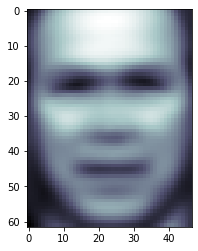

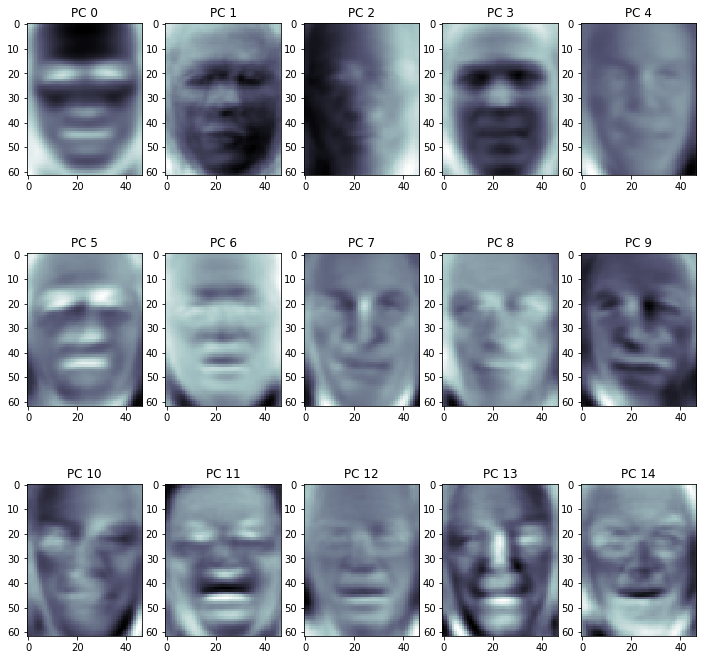

In [42]:
#Display mean image and top PCs (eigenfaces)
m = X.mean(axis=0)
m=m.reshape(62,47)
plt.imshow(m, cmap="bone")
plt.show()

fig, plots = plt.subplots(3, 5, figsize=(12,12))
vh = pca(X)
for i,p in enumerate(plots.flatten()):
    im = vh[i].reshape(62,47)
    p.imshow(im, cmap='bone')
    p.set_title(f"PC {i}")
    #p.title(f"image {k}")

### Use the results of your PCA function to transform the test images using a number of top PCs

a. Recall centering the data before transformation by using the mean of the training data. 

b. Transform the test dataset by using the top {100,50,10,2} PCs of the training data.

c. Plot the top 2 PCs of the test data in a 2D scatter plot (use the _scatter_ implementation), assigning a distinct color to each class. The _x_-axis should be the first PC, while the _y_-axis should be the second PC. **Hint:** you may use _np.unique_ to choose the unique labels and _np.where_ to choose the transformed samples based on their labels.

In [20]:
#Transform test images using your implementation of PCA


### Reconstruct the transformed test images and display them

a. Reconstruct all transformed test images (for the top {100, 50, 10,2} PCs).

b. Display the first **5** reconstructed images in a grid of 4 rows X 5 columns with a **figure** size of 12 X 12. Row 1 should display the first **5** images reconstructed by using the top 100 PCs, the second row should display the first **5** images reconstructed by using the top 50 PCs, row 3 should display the first **5** images reconstructed by using the top 10 PCs, and row 4 should display the first **5** images reconstructed by using the top 2 PCs. The total number of images to be displayed should be **20**.

c. Use the 'bone' color map to display the reconstructed images.

d. Display the label of each reconstructed image at the top of it. 

In [6]:
#Reconstruct the transformed test images and display them

### Compute the Mean Squared Error (MSE) between all reconstructed test images and the original test images

a. The MSE should be computed for the four cases; i.e., reconstruction after transformation using the top {100, 50, 10, 2} PCs. Recall that the MSE measures the average of the squared errors, i.e., the average squared difference between the reconstructed images and the original images. 

b. Make sure to clearly display the case that achieves the lowest reconstruction error.

In [3]:
# Compute the Mean Squared Error (MSE) between all reconstructed test images and the original test images